# Installation des packages

In [1]:
!pip3 install linearmodels
import pandas as pd
import numpy as np
import linearmodels
from linearmodels.iv import IV2SLS

# Importation des données

In [2]:
# On prend le dataset esge avec toutes les dates
esg_data = pd.read_csv('ESG_E.csv')
esg_data.head()

/tmp/ipykernel_24112/2631595158.py:2: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  esg_data = pd.read_csv('ESG_E.csv')


,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,"44,375","44,08888889","44,08627778","44,08371889","44,08121118","44,07875362","44,07634522","43,7962072","44,21611639",...,"60,4206142","57,30323449","56,92830124","56,94691093","57,36955728","56,37531796","55,29196737","55,42993636","55,71251352","56,08985466"
1,2,"40,90277778","40,63055556","40,64155556","40,65233556","40,66289996","40,67325307","40,40562134","40,42112002","40,43630873",...,"73,44261856","73,25716506","72,94483216","72,55042001","73,64794086","74,07164631","74,00185758","74,20052537","74,09938254","74,07640744"
2,3,"49,51388889","49,51388889","49,51388889","49,51388889","49,51388889","50,06944444","50,05833333","50,04744444","50,31455111",...,"74,65986533","74,65596497","74,96295978","75,13466786","75,37141777","75,02208314","75,16479506","75,54714096","75,36927013","75,09739596"
3,4,"38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889",...,"60,55539706","60,67762245","60,51962556","60,3647886","60,49082616","62,00323186","62,37427834","62,73790388","62,81647914","62,61570511"
4,5,"37,91666667","38,20833333","35,43861111","35,50206111","36,39757544","34,77517949","34,01856479","32,16597127","32,29487407",...,"53,46184228","53,79463351","53,77218636","53,82112083","54,07152963","54,23695602","55,12772167","55,16972037","54,98915515","54,85916779"


In [3]:
# On prend le score de comm environnemental que l'on a calculé
env_comm_score = pd.read_csv('env_comm_score_articles_forces.csv')

# Normalisation du score sde communication environnemental
env_comm_score['environmental_sentiment_score'] = ((env_comm_score['environmental_sentiment_score'] - env_comm_score['environmental_sentiment_score'].min()) / (env_comm_score['environmental_sentiment_score'].max() - env_comm_score['environmental_sentiment_score'].min())) * 2 - 1

env_comm_score.head()

,Entreprise_Insérée_1,ISIN,environmental_sentiment_score
0,Kirloskar Brothers Ltd,INE732A01036,-0.448846
1,Seer Inc,US81578P1066,-0.312214
2,Samsung Life Insurance Co Ltd,KR7032830002,-0.593592
3,Kontoor Brands Inc,US50050N1037,-0.513899
4,Tauron Polska Energia SA,PLTAURN00011,-0.457379


In [4]:
# Nb de lignes avec erreur: 1 sur 13000
covalence_id_firms = pd.read_csv('Universe_Listed_Covalence_31.07.2023_v2_updated.csv',sep=';',on_bad_lines='skip')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [5]:
covalence_id_firms.to_pickle('covalence_id_firms.pkl')
covalence_id_firms = pd.read_pickle('covalence_id_firms.pkl')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [6]:
covalence_id_firms = covalence_id_firms.drop(columns=['Unnamed: 0','GICS industry group','GICS sub-industry','Headquarters Region','Headquarters Country'], axis=1)
covalence_id_firms.head()

,idEntreprise,Company,ISIN
0,1,Pfizer Inc,US7170811035
1,2,Merck & Co Inc,US58933Y1055
2,3,GSK plc,GB0009252882
3,4,Eli Lilly and Co,US5324571083
4,5,Bayer AG,DE000BAY0017


In [7]:
# Effectuer une jointure (merge) entre df1 et df2 sur la colonne 'ISIN'
env_comm_score = pd.merge(covalence_id_firms, env_comm_score, on='ISIN', how='inner').drop(columns=['Entreprise_Insérée_1'])

# Afficher les premières lignes du DataFrame fusionné pour vérification
env_comm_score


,idEntreprise,Company,ISIN,environmental_sentiment_score
0,116,General Electric Co,US3696041033,-0.458341
1,1909,Kajima Corp,JP3210200006,-0.232848
2,1951,Cigna Corp,US1255231003,-0.465797
3,1968,Aegon NV,NL0000303709,-0.195420
4,2035,SSE PLC,GB0007908733,-0.330052
...,...,...,...,...
95,19300,Zhuzhou Hongda Electronics Corp Ltd,CNE1000035L3,-0.013659
96,19419,Maten Petroleum AO,KZ1C00000868,-0.367093
97,19461,Nixu Oyj,FI0009008387,1.000000
98,19615,Guangzhou Great Power Energy and Technology Co...,CNE100001Z17,-0.409353


On ne garde que le score ESG des entreprises dont on a un score de communication environemental :

In [8]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_esg_data = esg_data[esg_data['idEntreprise'].isin(env_comm_score['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
filtered_esg_data

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,"37,5","36,94444444","36,95555556","37,522","36,68822667","36,14890658","36,17592845","36,20240988","36,22836168",...,"81,3863865","81,38394368","81,39598911","81,22716959","81,26571116","81,87888281","82,00367903","81,81674803","81,72799745","82,99552569"
1,1909,50,50,50,50,50,50,50,50,50,...,"49,22720547","49,17391136","49,12168314","49,07049947","49,02033948","48,97118269","48,92300904","48,87579886","48,82953288","48,78419222"
2,1951,50,50,50,50,50,50,50,50,50,...,"52,60432774","52,54668563","52,49019636","52,43483687","52,38058458","52,32741733","52,27531343","52,77980716","52,71865546","52,6587268"
3,1968,"40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222",...,"51,16083164","51,11955945","51,07911271","50,48391934","51,01174096","50,97345058","50,93592601","50,89915194","50,86311334","50,82779552"
4,2035,"40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333",...,"61,92168624","62,29297473","62,10128191","61,91342293","61,72932114","61,54890139","61,37209002","61,19881489","61,86233859","61,67925849"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,17392,50,50,50,50,50,50,50,50,50,...,"49,82447931","49,8196564","49,81492993","49,810298","49,80575871","49,8013102","49,79695066","49,79267832","49,78849142","49,78438826"
67,17482,50,50,50,50,50,50,50,50,50,...,"41,49477778","41,47877111","41,46308458","41,44771178","41,43264643","41,69566017","41,67563585","41,65601202","41,63678067","41,61793395"
68,17561,50,50,50,50,50,50,50,50,50,...,"39,67552318","39,63201272","39,58937246","39,54758501","39,50663331","39,46650065","39,42717063","39,666405","41,84529912","42,59172647"
69,18221,50,50,50,50,50,50,50,50,50,...,"50,55555556","50,54444444","50,53355556","50,52288444","50,51242676","51,61328933","51,58102354","51,54940307","51,51841501","51,48804671"


In [9]:
summarized_data = pd.merge(filtered_esg_data, env_comm_score, on='idEntreprise', how='inner')
summarized_data

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,Company,ISIN,environmental_sentiment_score
0,116,"37,5","36,94444444","36,95555556","37,522","36,68822667","36,14890658","36,17592845","36,20240988","36,22836168",...,"81,22716959","81,26571116","81,87888281","82,00367903","81,81674803","81,72799745","82,99552569",General Electric Co,US3696041033,-0.458341
1,1909,50,50,50,50,50,50,50,50,50,...,"49,07049947","49,02033948","48,97118269","48,92300904","48,87579886","48,82953288","48,78419222",Kajima Corp,JP3210200006,-0.232848
2,1951,50,50,50,50,50,50,50,50,50,...,"52,43483687","52,38058458","52,32741733","52,27531343","52,77980716","52,71865546","52,6587268",Cigna Corp,US1255231003,-0.465797
3,1968,"40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222",...,"50,48391934","51,01174096","50,97345058","50,93592601","50,89915194","50,86311334","50,82779552",Aegon NV,NL0000303709,-0.195420
4,2035,"40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333",...,"61,91342293","61,72932114","61,54890139","61,37209002","61,19881489","61,86233859","61,67925849",SSE PLC,GB0007908733,-0.330052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,17392,50,50,50,50,50,50,50,50,50,...,"49,810298","49,80575871","49,8013102","49,79695066","49,79267832","49,78849142","49,78438826",Teleste Oyj,FI0009007728,-0.320573
67,17482,50,50,50,50,50,50,50,50,50,...,"41,44771178","41,43264643","41,69566017","41,67563585","41,65601202","41,63678067","41,61793395",Itera ASA,NO0010001118,-0.419477
68,17561,50,50,50,50,50,50,50,50,50,...,"39,54758501","39,50663331","39,46650065","39,42717063","39,666405","41,84529912","42,59172647",Siamgas and Petrochemicals PCL,TH0979A10Z00,-0.362318
69,18221,50,50,50,50,50,50,50,50,50,...,"50,52288444","50,51242676","51,61328933","51,58102354","51,54940307","51,51841501","51,48804671",Gateway Real Estate AG,DE000A0JJTG7,-0.258595


# Visualisation

## Score environnementale

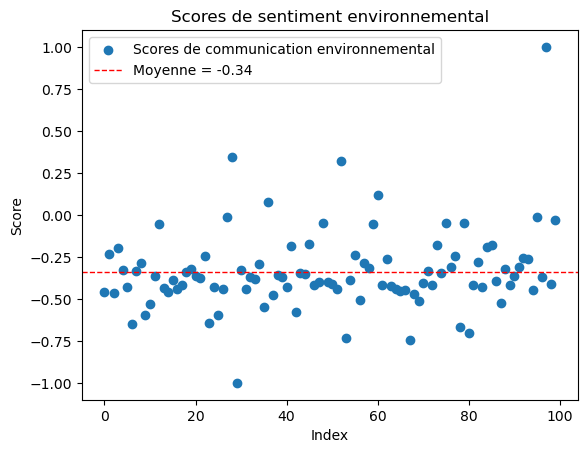

In [10]:
import matplotlib.pyplot as plt

# Données à tracer
x = range(100)
y = env_comm_score['environmental_sentiment_score']

# Tracer le nuage de points
plt.scatter(x, y, label='Scores de communication environnemental')

# Calculer et tracer la moyenne
mean_environmental_sentiment_score = env_comm_score['environmental_sentiment_score'].mean()
plt.axhline(mean_environmental_sentiment_score, color='red', linestyle='dashed', linewidth=1, label=f'Moyenne = {mean_environmental_sentiment_score:.2f}')

# Ajouter des titres et des labels
plt.title('Scores de sentiment environnemental')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()

# Afficher le graphique
plt.show()

## Score ESG

In [11]:
def visu_cours_esg(num_entreprise,):

    visu_esg_company = summarized_data['Company'].iloc[num_entreprise]
    visu_esg_data = summarized_data.drop(columns=['idEntreprise','Company','ISIN','environmental_sentiment_score']).iloc[num_entreprise]

    # Convertir les données en float et supprimer l'index 'idEntreprise'
    visu_esg_data = visu_esg_data.str.replace(',', '.').astype(float)

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_esg_data.index[1:], visu_esg_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=45, ticks=visu_esg_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du critère ESG de l'entreprise " + visu_esg_company
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Note ESG')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

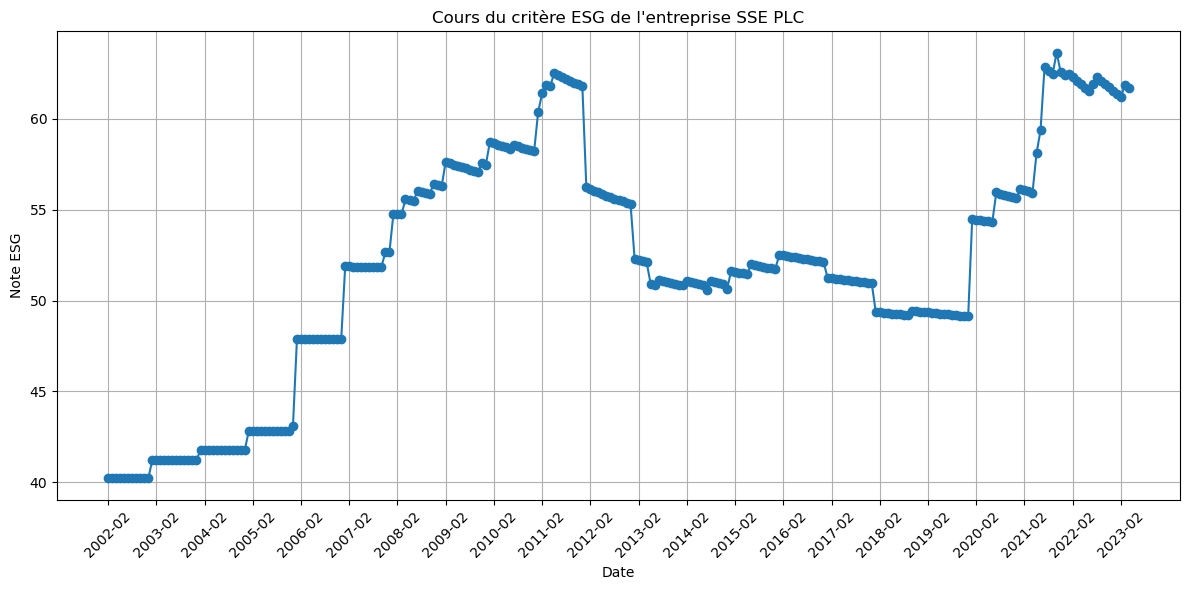

In [12]:
visu_cours_esg(4)

# Manipulation des données

## Construction de la variable de communication environnemental dans le temps 

On a des données de score de communication environnemental pour une période (en Décembre 2023), en revanche, on a besoin de données de panels, ils nous faut donc le score de communication environnemental de janvier 2002 à Avril 2023. 

- Aléa + variation du critère ESG : On peut faire l'hypothèse que les agences de cotations font bien leur boulot. Ainsi, on analyse leur séries temporelles, dès lors que le score ESG attribué à une entreprise diminue, ou varie négativement en dessous d'un seuil, alors l'entreprise cherche à communiquer de manière verte.
-  Aléa pur : on peut considérer que le score environementale d'une entreprise est complètement aléatoire, on part du score environemental que l'on a, et on ajoute un epsilon à chaque période

#### Fonction pour visualiser le score de communication environemental dans le temps, une fois qu'on a ajouté l'aléa

In [13]:
def visu_cours_env_comm_score(num_entreprise, df):

    visu_company = df['Company'].iloc[num_entreprise]
    # Liste des colonnes à supprimer
    colonnes_a_supprimer = ['idEntreprise', 'Company', 'ISIN', 'env_sentiment_score_2023-12', 'environmental_sentiment_score']

    # Vérifie la présence de chaque colonne avant de la supprimer
    for colonne in colonnes_a_supprimer:
        if colonne in df.columns:
            df.drop(columns=[colonne], inplace=True)

    # Sélectionne la ligne spécifiée par num_entreprise
    visu_data = df.iloc[num_entreprise]

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_data.index[1:], visu_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=90, ticks=visu_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du score de communication environemental de l'entreprise " + visu_company
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Score de communication environemental')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

### Ajout aléa pur dans le score environnemental

#### Aléa = Uniforme sur [-0.2,0.2]

In [14]:
# Liste des mois de janvier 2002 à avril 2023
months = pd.date_range(start='2002-01-01', end='2023-04-01', freq='MS')

# Liste pour stocker les nouvelles colonnes
new_columns = []

# Création des colonnes pour chaque mois avec de l'aléa
for month in months:
    col_name = f"env_sentiment_score_{month.strftime('%Y-%m')}"
    
    # Calcul du score avec ajout d'aléa
    new_col = env_comm_score['environmental_sentiment_score'] + np.random.uniform(-0.2, 0.2)
    
    # Ajuster les valeurs pour s'assurer qu'elles restent entre -1 et 1
    new_col = np.clip(new_col, -1, 1)
    
    new_col.rename(col_name, inplace=True)
    new_columns.append(new_col)

# Concaténation des nouvelles colonnes au DataFrame original
env_comm_score_extended_unif  = pd.concat([env_comm_score] + new_columns, axis=1)
env_comm_score_extended_unif.rename(columns={'environmental_sentiment_score': 'env_sentiment_score_2023-12'}, inplace=True)

# Affichage du DataFrame
env_comm_score_extended_unif.head()


,idEntreprise,Company,ISIN,env_sentiment_score_2023-12,env_sentiment_score_2002-01,env_sentiment_score_2002-02,env_sentiment_score_2002-03,env_sentiment_score_2002-04,env_sentiment_score_2002-05,env_sentiment_score_2002-06,...,env_sentiment_score_2022-07,env_sentiment_score_2022-08,env_sentiment_score_2022-09,env_sentiment_score_2022-10,env_sentiment_score_2022-11,env_sentiment_score_2022-12,env_sentiment_score_2023-01,env_sentiment_score_2023-02,env_sentiment_score_2023-03,env_sentiment_score_2023-04
0,116,General Electric Co,US3696041033,-0.458341,-0.277135,-0.555426,-0.397071,-0.515641,-0.640047,-0.459184,...,-0.465889,-0.545805,-0.275158,-0.651946,-0.265189,-0.629505,-0.540366,-0.418455,-0.654848,-0.490532
1,1909,Kajima Corp,JP3210200006,-0.232848,-0.051641,-0.329932,-0.171578,-0.290147,-0.414554,-0.233691,...,-0.240396,-0.320312,-0.049665,-0.426453,-0.039696,-0.404012,-0.314873,-0.192962,-0.429355,-0.265039
2,1951,Cigna Corp,US1255231003,-0.465797,-0.284590,-0.562881,-0.404527,-0.523096,-0.647502,-0.466640,...,-0.473345,-0.553261,-0.282613,-0.659401,-0.272645,-0.636961,-0.547822,-0.425910,-0.662304,-0.497988
3,1968,Aegon NV,NL0000303709,-0.195420,-0.014214,-0.292505,-0.134150,-0.252720,-0.377126,-0.196263,...,-0.202968,-0.282884,-0.012237,-0.389025,-0.002268,-0.366584,-0.277445,-0.155534,-0.391928,-0.227611
4,2035,SSE PLC,GB0007908733,-0.330052,-0.148845,-0.427136,-0.268782,-0.387351,-0.511758,-0.330895,...,-0.337600,-0.417516,-0.146869,-0.523657,-0.136900,-0.501216,-0.412077,-0.290166,-0.526559,-0.362243


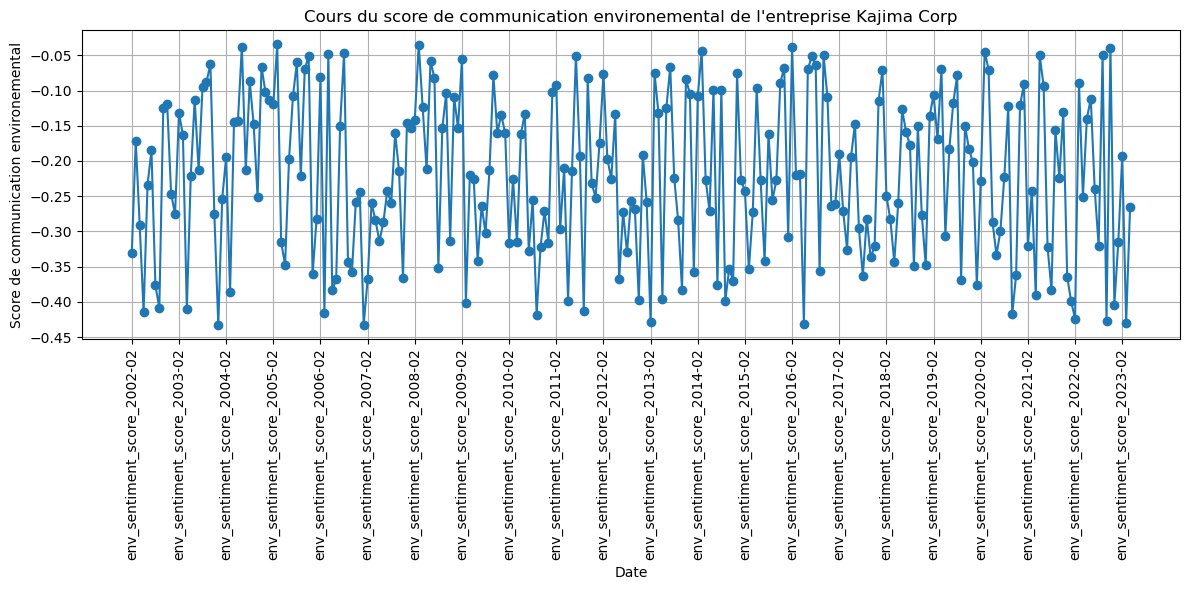

In [15]:
visu_cours_env_comm_score(1, env_comm_score_extended_unif)

#### Aléa = Normal (0 ; 0.5)

In [16]:
# Liste pour stocker les nouvelles colonnes
new_columns = []

# Création des colonnes pour chaque mois avec de l'aléa
for month in months:
    col_name = f"env_sentiment_score_{month.strftime('%Y-%m')}"
    
    # Calcul du score avec ajout d'aléa
    new_col = env_comm_score['environmental_sentiment_score'] + np.random.normal(0, 0.5)
    
    # Ajuster les valeurs pour s'assurer qu'elles restent entre -1 et 1
    new_col = np.clip(new_col, -1, 1)
    
    new_col.rename(col_name, inplace=True)
    new_columns.append(new_col)

# Concaténation des nouvelles colonnes au DataFrame original
env_comm_score_extended_normal  = pd.concat([env_comm_score] + new_columns, axis=1)
env_comm_score_extended_normal.rename(columns={'environmental_sentiment_score': 'env_sentiment_score_2023-12'}, inplace=True)

# Affichage du DataFrame
env_comm_score_extended_normal.head()

,idEntreprise,Company,ISIN,env_sentiment_score_2023-12,env_sentiment_score_2002-01,env_sentiment_score_2002-02,env_sentiment_score_2002-03,env_sentiment_score_2002-04,env_sentiment_score_2002-05,env_sentiment_score_2002-06,...,env_sentiment_score_2022-07,env_sentiment_score_2022-08,env_sentiment_score_2022-09,env_sentiment_score_2022-10,env_sentiment_score_2022-11,env_sentiment_score_2022-12,env_sentiment_score_2023-01,env_sentiment_score_2023-02,env_sentiment_score_2023-03,env_sentiment_score_2023-04
0,116,General Electric Co,US3696041033,-0.458341,-0.503325,0.515090,-0.026333,-0.386159,0.133559,-0.802176,...,-0.374263,-0.152968,-0.664491,-0.488472,-0.646061,0.430296,-0.039032,-1.000000,-0.704695,-0.168763
1,1909,Kajima Corp,JP3210200006,-0.232848,-0.277832,0.740583,0.199160,-0.160666,0.359052,-0.576683,...,-0.148770,0.072525,-0.438998,-0.262979,-0.420568,0.655789,0.186461,-0.956880,-0.479202,0.056730
2,1951,Cigna Corp,US1255231003,-0.465797,-0.510781,0.507634,-0.033789,-0.393614,0.126103,-0.809632,...,-0.381719,-0.160423,-0.671947,-0.495928,-0.653517,0.422840,-0.046488,-1.000000,-0.712151,-0.176218
3,1968,Aegon NV,NL0000303709,-0.195420,-0.240405,0.778011,0.236588,-0.123238,0.396480,-0.539255,...,-0.111342,0.109953,-0.401570,-0.225551,-0.383140,0.693217,0.223889,-0.919452,-0.441774,0.094158
4,2035,SSE PLC,GB0007908733,-0.330052,-0.375036,0.643379,0.101956,-0.257870,0.261848,-0.673887,...,-0.245974,-0.024679,-0.536202,-0.360183,-0.517772,0.558585,0.089257,-1.000000,-0.576406,-0.040474


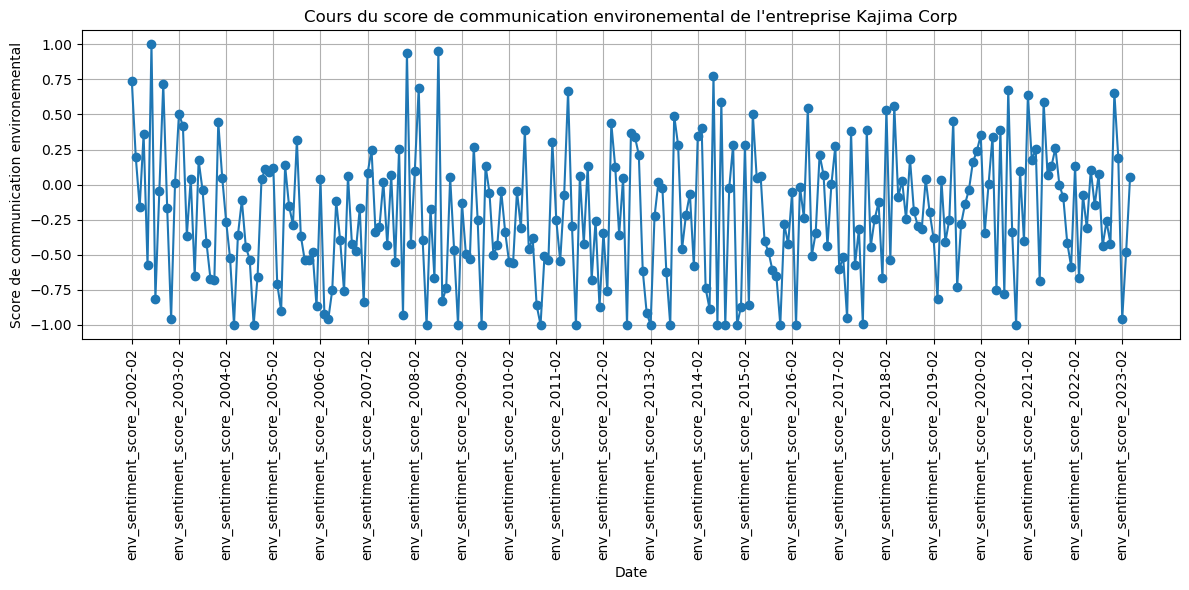

In [17]:
visu_cours_env_comm_score(1, env_comm_score_extended_normal)

### Aléa + critère ESG

On regarde les variations des cotations du critère ESG, en y ajoutant un bruit : Normale ( 0 , 0.01 )

In [18]:
# Sélectionner les colonnes sur lesquelles appliquer la fonction de variation
cols_to_change = filtered_esg_data.columns.difference(['idEntreprise'])

# Remplacer les virgules par des points dans les colonnes sélectionnées
filtered_esg_data[cols_to_change] = filtered_esg_data[cols_to_change].replace(',', '.', regex=True)

# Convertir les colonnes sélectionnées en type numérique
filtered_esg_data[cols_to_change] = filtered_esg_data[cols_to_change].apply(pd.to_numeric)

# Calculer la variation mensuelle pour les colonnes sélectionnées
variation_mensuelle = filtered_esg_data[cols_to_change].diff(axis=1) / filtered_esg_data[cols_to_change].shift(axis=1)

# Remplacer les valeurs infinies par NaN
variation_mensuelle.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ajouter du bruit aux variations mensuelles
noise = np.random.normal(loc=0, scale=0.01, size=variation_mensuelle.shape)
var_bruit_esg_data = variation_mensuelle + noise

# Concaténer la colonne 'idEntreprises' avec les variations calculées
var_bruit_esg_data = pd.concat([filtered_esg_data['idEntreprise'], var_bruit_esg_data], axis=1)

# Afficher le résultat
var_bruit_esg_data


/tmp/ipykernel_24112/3826517698.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variation_mensuelle = filtered_esg_data[cols_to_change].diff(axis=1) / filtered_esg_data[cols_to_change].shift(axis=1)
/tmp/ipykernel_24112/3826517698.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variation_mensuelle = filtered_esg_data[cols_to_change].diff(axis=1) / filtered_esg_data[cols_to_change].shift(axis=1)


,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,NaN,0.009557,0.002787,0.026682,-0.017341,-0.018783,0.009469,0.005850,-0.017262,...,0.015395,0.012599,-0.002686,0.014673,-0.012863,0.009078,-0.000284,0.006263,0.031340,0.018997
1,1909,NaN,0.011691,0.002890,0.002884,0.005881,0.007378,0.008879,-0.002076,0.007538,...,0.004400,-0.006455,0.014176,-0.005804,-0.000501,-0.011308,-0.001287,-0.006336,-0.005992,-0.009899
2,1951,NaN,0.008424,0.000322,-0.023648,0.018766,0.003454,-0.006244,-0.008738,0.004583,...,-0.002071,-0.020075,0.027199,0.010059,-0.010991,-0.002154,0.006773,0.022557,-0.002194,0.003319
3,1968,NaN,-0.007728,-0.007044,0.000218,-0.009504,0.004295,0.015027,0.002645,0.006961,...,-0.003856,-0.005277,-0.005603,-0.012658,0.015483,-0.014272,-0.009156,-0.015974,0.001941,-0.014435
4,2035,NaN,-0.003373,0.010499,-0.002972,-0.011373,-0.014684,-0.005285,-0.005637,0.014239,...,0.017042,0.015953,-0.016040,-0.007579,-0.006989,-0.000746,-0.010636,-0.001423,0.003973,-0.009031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,17392,NaN,-0.004122,0.004255,-0.012999,0.000026,-0.009251,-0.006686,-0.005100,-0.006908,...,-0.003318,-0.008267,0.000461,-0.003058,0.016895,-0.001674,-0.004751,0.007246,-0.011130,-0.010541
67,17482,NaN,0.020386,0.000241,0.006186,-0.008057,0.011236,0.005054,0.004888,-0.007317,...,-0.014351,-0.003039,-0.011046,-0.025666,-0.000006,0.011353,-0.024441,-0.007307,0.013730,-0.004606
68,17561,NaN,-0.009744,-0.001290,-0.001868,-0.003482,-0.000830,0.023371,-0.000331,0.010350,...,-0.012149,0.004392,0.006050,-0.016387,0.013327,0.006897,0.027275,0.005776,0.052903,-0.005862
69,18221,NaN,0.002192,-0.019685,0.003206,-0.005262,0.002064,0.007676,-0.002079,-0.005991,...,0.012312,-0.001313,-0.008428,-0.000275,-0.002545,0.035459,-0.003427,-0.019875,0.006954,-0.009001


Si on suppose qu'une entreprise communique de manière verte, et qu'il faut un certain nombre de mois (qu'on nottera h) pour que la notation soit impactée par ces communications, on décale les colonnes de h 

In [19]:
h = 2

var_bruit_shift_esg_data = var_bruit_esg_data[cols_to_change].shift(h, axis=1)

# Générer des valeurs aléatoires pour remplacer les NaN
random_values = np.random.rand(*var_bruit_shift_esg_data.shape)

# Remplacer les NaN par des valeurs aléatoires
var_bruit_shift_esg_data_filled = var_bruit_shift_esg_data.mask(var_bruit_shift_esg_data.isnull(), random_values)

# Afficher les premières lignes du DataFrame avec valeurs aléatoires
var_bruit_shift_esg_data_filled.head()

,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0.184637,0.263007,0.834646,0.009557,0.002787,0.026682,-0.017341,-0.018783,0.009469,0.005850,...,-0.001277,-0.014212,0.015395,0.012599,-0.002686,0.014673,-0.012863,0.009078,-0.000284,0.006263
1,0.001413,0.286045,0.708295,0.011691,0.002890,0.002884,0.005881,0.007378,0.008879,-0.002076,...,-0.003884,-0.002609,0.004400,-0.006455,0.014176,-0.005804,-0.000501,-0.011308,-0.001287,-0.006336
2,0.269150,0.221212,0.338111,0.008424,0.000322,-0.023648,0.018766,0.003454,-0.006244,-0.008738,...,0.005476,0.025849,-0.002071,-0.020075,0.027199,0.010059,-0.010991,-0.002154,0.006773,0.022557
3,0.721170,0.869450,0.465631,-0.007728,-0.007044,0.000218,-0.009504,0.004295,0.015027,0.002645,...,0.001772,-0.010466,-0.003856,-0.005277,-0.005603,-0.012658,0.015483,-0.014272,-0.009156,-0.015974
4,0.555152,0.938834,0.735390,-0.003373,0.010499,-0.002972,-0.011373,-0.014684,-0.005285,-0.005637,...,0.003264,-0.007523,0.017042,0.015953,-0.016040,-0.007579,-0.006989,-0.000746,-0.010636,-0.001423


In [26]:
# Sélectionner la valeur finale de 2023-04 pour chaque entreprise
valeur_finale_2023_04 = summarized_data.loc[:, ['idEntreprise', 'environmental_sentiment_score']]

# Initialiser un DataFrame pour stocker les valeurs initiales et finales
valeurs_initiales_finales = valeur_finale_2023_04.copy()

# Liste pour stocker les nouvelles colonnes
new_columns = []

# Parcourir les colonnes de var_bruit_shift_esg_data_filled en sens inverse
for col in reversed(var_bruit_shift_esg_data_filled.columns):
    # Calculer les valeurs initiales à partir des valeurs finales et des taux de variation
    new_col = valeurs_initiales_finales['environmental_sentiment_score'] / (1 + var_bruit_shift_esg_data_filled[col])
    new_col.name = col  # Nommer la nouvelle colonne
    new_columns.insert(0,new_col)

# Concaténer les nouvelles colonnes au DataFrame existant
valeurs_initiales_finales = pd.concat([valeurs_initiales_finales] + new_columns, axis=1)
env_comm_score_extended_esg = pd.merge(env_comm_score, valeurs_initiales_finales, on=['idEntreprise', 'environmental_sentiment_score'], how='inner')

# Afficher les valeurs initiales et finales
env_comm_score_extended_esg.head()

,idEntreprise,Company,ISIN,environmental_sentiment_score,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,General Electric Co,US3696041033,-0.458341,-0.386904,-0.362897,-0.249825,-0.454002,-0.457067,-0.446430,...,-0.458927,-0.464949,-0.451392,-0.452638,-0.459575,-0.451713,-0.464313,-0.454218,-0.458472,-0.455488
1,1909,Kajima Corp,JP3210200006,-0.232848,-0.232520,-0.181057,-0.136304,-0.230157,-0.232177,-0.232178,...,-0.233756,-0.233457,-0.231828,-0.234361,-0.229593,-0.234207,-0.232965,-0.235511,-0.233148,-0.234333
2,1951,Cigna Corp,US1255231003,-0.465797,-0.367015,-0.381422,-0.348100,-0.461906,-0.465647,-0.477078,...,-0.463260,-0.454060,-0.466763,-0.475339,-0.453463,-0.461158,-0.470973,-0.466802,-0.462663,-0.455522
3,1968,Aegon NV,NL0000303709,-0.195420,-0.113539,-0.104533,-0.133335,-0.196942,-0.196806,-0.195377,...,-0.195074,-0.197487,-0.196177,-0.196457,-0.196521,-0.197926,-0.192441,-0.198250,-0.197226,-0.198592
4,2035,SSE PLC,GB0007908733,-0.330052,-0.212231,-0.170232,-0.190189,-0.331169,-0.326623,-0.331036,...,-0.328978,-0.332554,-0.324521,-0.324869,-0.335432,-0.332573,-0.332375,-0.330298,-0.333600,-0.330522


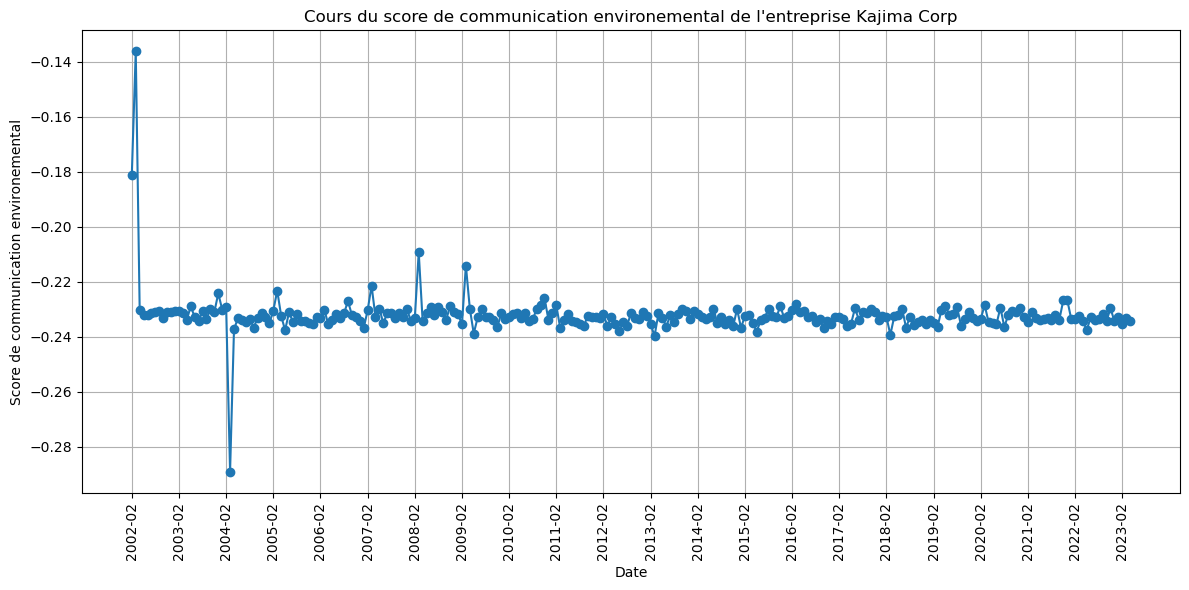

In [27]:
visu_cours_env_comm_score(1, env_comm_score_extended_esg)

# Le reste du code

In [21]:
def get_user_date(start_date, end_date):
    # Prompt the user for a date
    user_date_str = input(f"Enter a date between {start_date} and {end_date} (format YYYY-MM): ")
    
    # Convert user input to a pandas Timestamp
    try:
        user_date = pd.to_datetime(user_date_str, format='%Y-%m')
        start_date = pd.to_datetime(start_date, format='%Y-%m')
        end_date = pd.to_datetime(end_date, format='%Y-%m')

        # Check if the date is within the range
        if start_date <= user_date <= end_date:
            print(f"Selected date: {user_date.strftime('%Y-%m')}")
            return user_date
        else:
            print("Date is out of range. Please try again.")
            return None
    except ValueError:
        print("Invalid date format. Please try again.")
        return None

# Example usage
get_user_date("2002-01", "2023-04")


Enter a date between 2002-01 and 2023-04 (format YYYY-MM):  fez


Invalid date format. Please try again.


In [22]:
# On laisse l'utilisateur choisir une date
date_debut="2002-01"
date_fin="2023-04"
t = get_user_date(date_debut,date_fin)
t = pd.to_datetime(t, format='%Y-%m')
t_minus_1 = (t - pd.DateOffset(months=1)).strftime('%Y-%m')
print(t_minus_1)

# On recupère les scores des etp aux dates t et t-1
col_index = esg_data.columns.get_loc(t)
esge_t = esg_data.iloc[:, col_index]
col_index = esg_data.columns.get_loc(t_minus_1)
esge_t_minus_1 = esg_data.iloc[:, col_index]

Enter a date between 2002-01 and 2023-04 (format YYYY-MM):  fe


Invalid date format. Please try again.


TypeError: unsupported operand type(s) for -: 'NoneType' and 'DateOffset'

In [ ]:
data = {
    'env_comm_score': env_comm_score, 
    'esge': esge_t
    'esge_past': esge_t_minus_1
    'esge_peer': np.random.uniform(0, 100, 100)  # 100 peer environmental scores in the same sector
}

df = pd.DataFrame(data)

# Show the first few rows of the DataFrame
print(df.head())

# Define your variables
dependent = df['env_comm_score']
independent = df[['const']]  # Assuming you've added a constant term to your DataFrame
instrument = df['esge_past']  # Instrumenting esge with its past value
endogenous = df['esge']  # The variable you believe is endogenous

# Setup and run the 2SLS regression
model = IV2SLS(dependent, independent, endogenous, instrument).fit()

# Print model summary
print(model.summary)

# To instrument 'esge' with both its past value and peer scores, you might do:
instrument2 = df[['esge_past', 'esge_peer']]
model2 = IV2SLS(dependent, independent, endogenous, instrument2).fit()
print(model2.summary)
